<a href="https://colab.research.google.com/github/693080593/research/blob/master/3_Sets_%5B5%5D_cHB_R%26L_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs


# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude Yield Data ML 080620.csv')
Original_Oil_Yields = data['Bio-crude Oil Yield']
Original_Features = data.drop('Bio-crude Oil Yield', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude dataset has 225 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,85.50
30,30.9,27.3,0.0,0.0,32.7,0.0,9.1,41.00
60,13.3,25.5,0.0,0.0,38.7,0.0,0.0,27.10
90,6.5,65.2,0.0,0.0,20.7,0.0,8.0,38.00
120,1.9,23.4,66.4,0.0,8.0,0.0,0.0,23.60
150,0.0,0.0,0.0,0.0,100.0,0.0,0.0,1.30
180,0.0,0.0,39.2,35.1,0.0,20.2,0.0,26.98
210,0.0,0.0,0.0,100.0,0.0,0.0,0.0,6.50


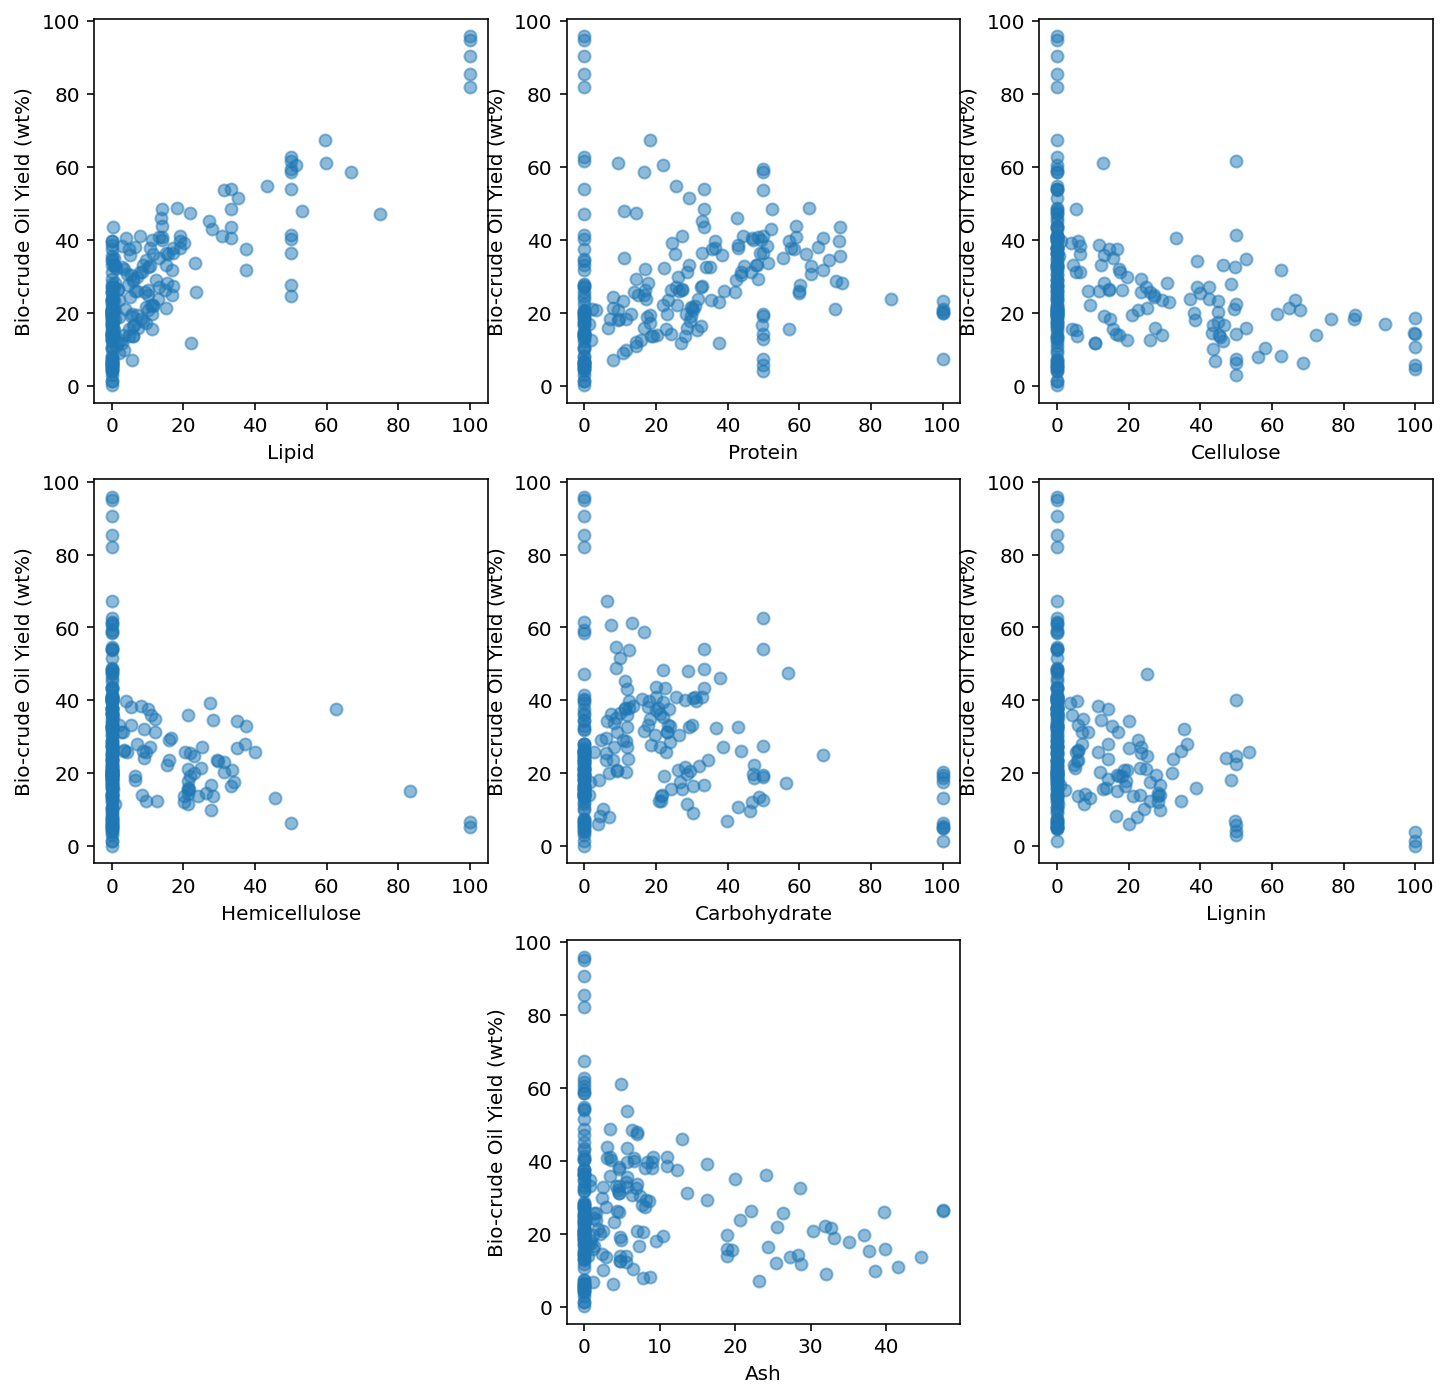

In [ ]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil Yield (wt%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil Yield (wt%)')
plt.scatter(data['Protein'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil Yield (wt%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil Yield (wt%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil Yield (wt%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil Yield (wt%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil Yield (wt%)')
plt.scatter(data['Ash'],data['Bio-crude Oil Yield'],alpha = 0.5)
plt.show()

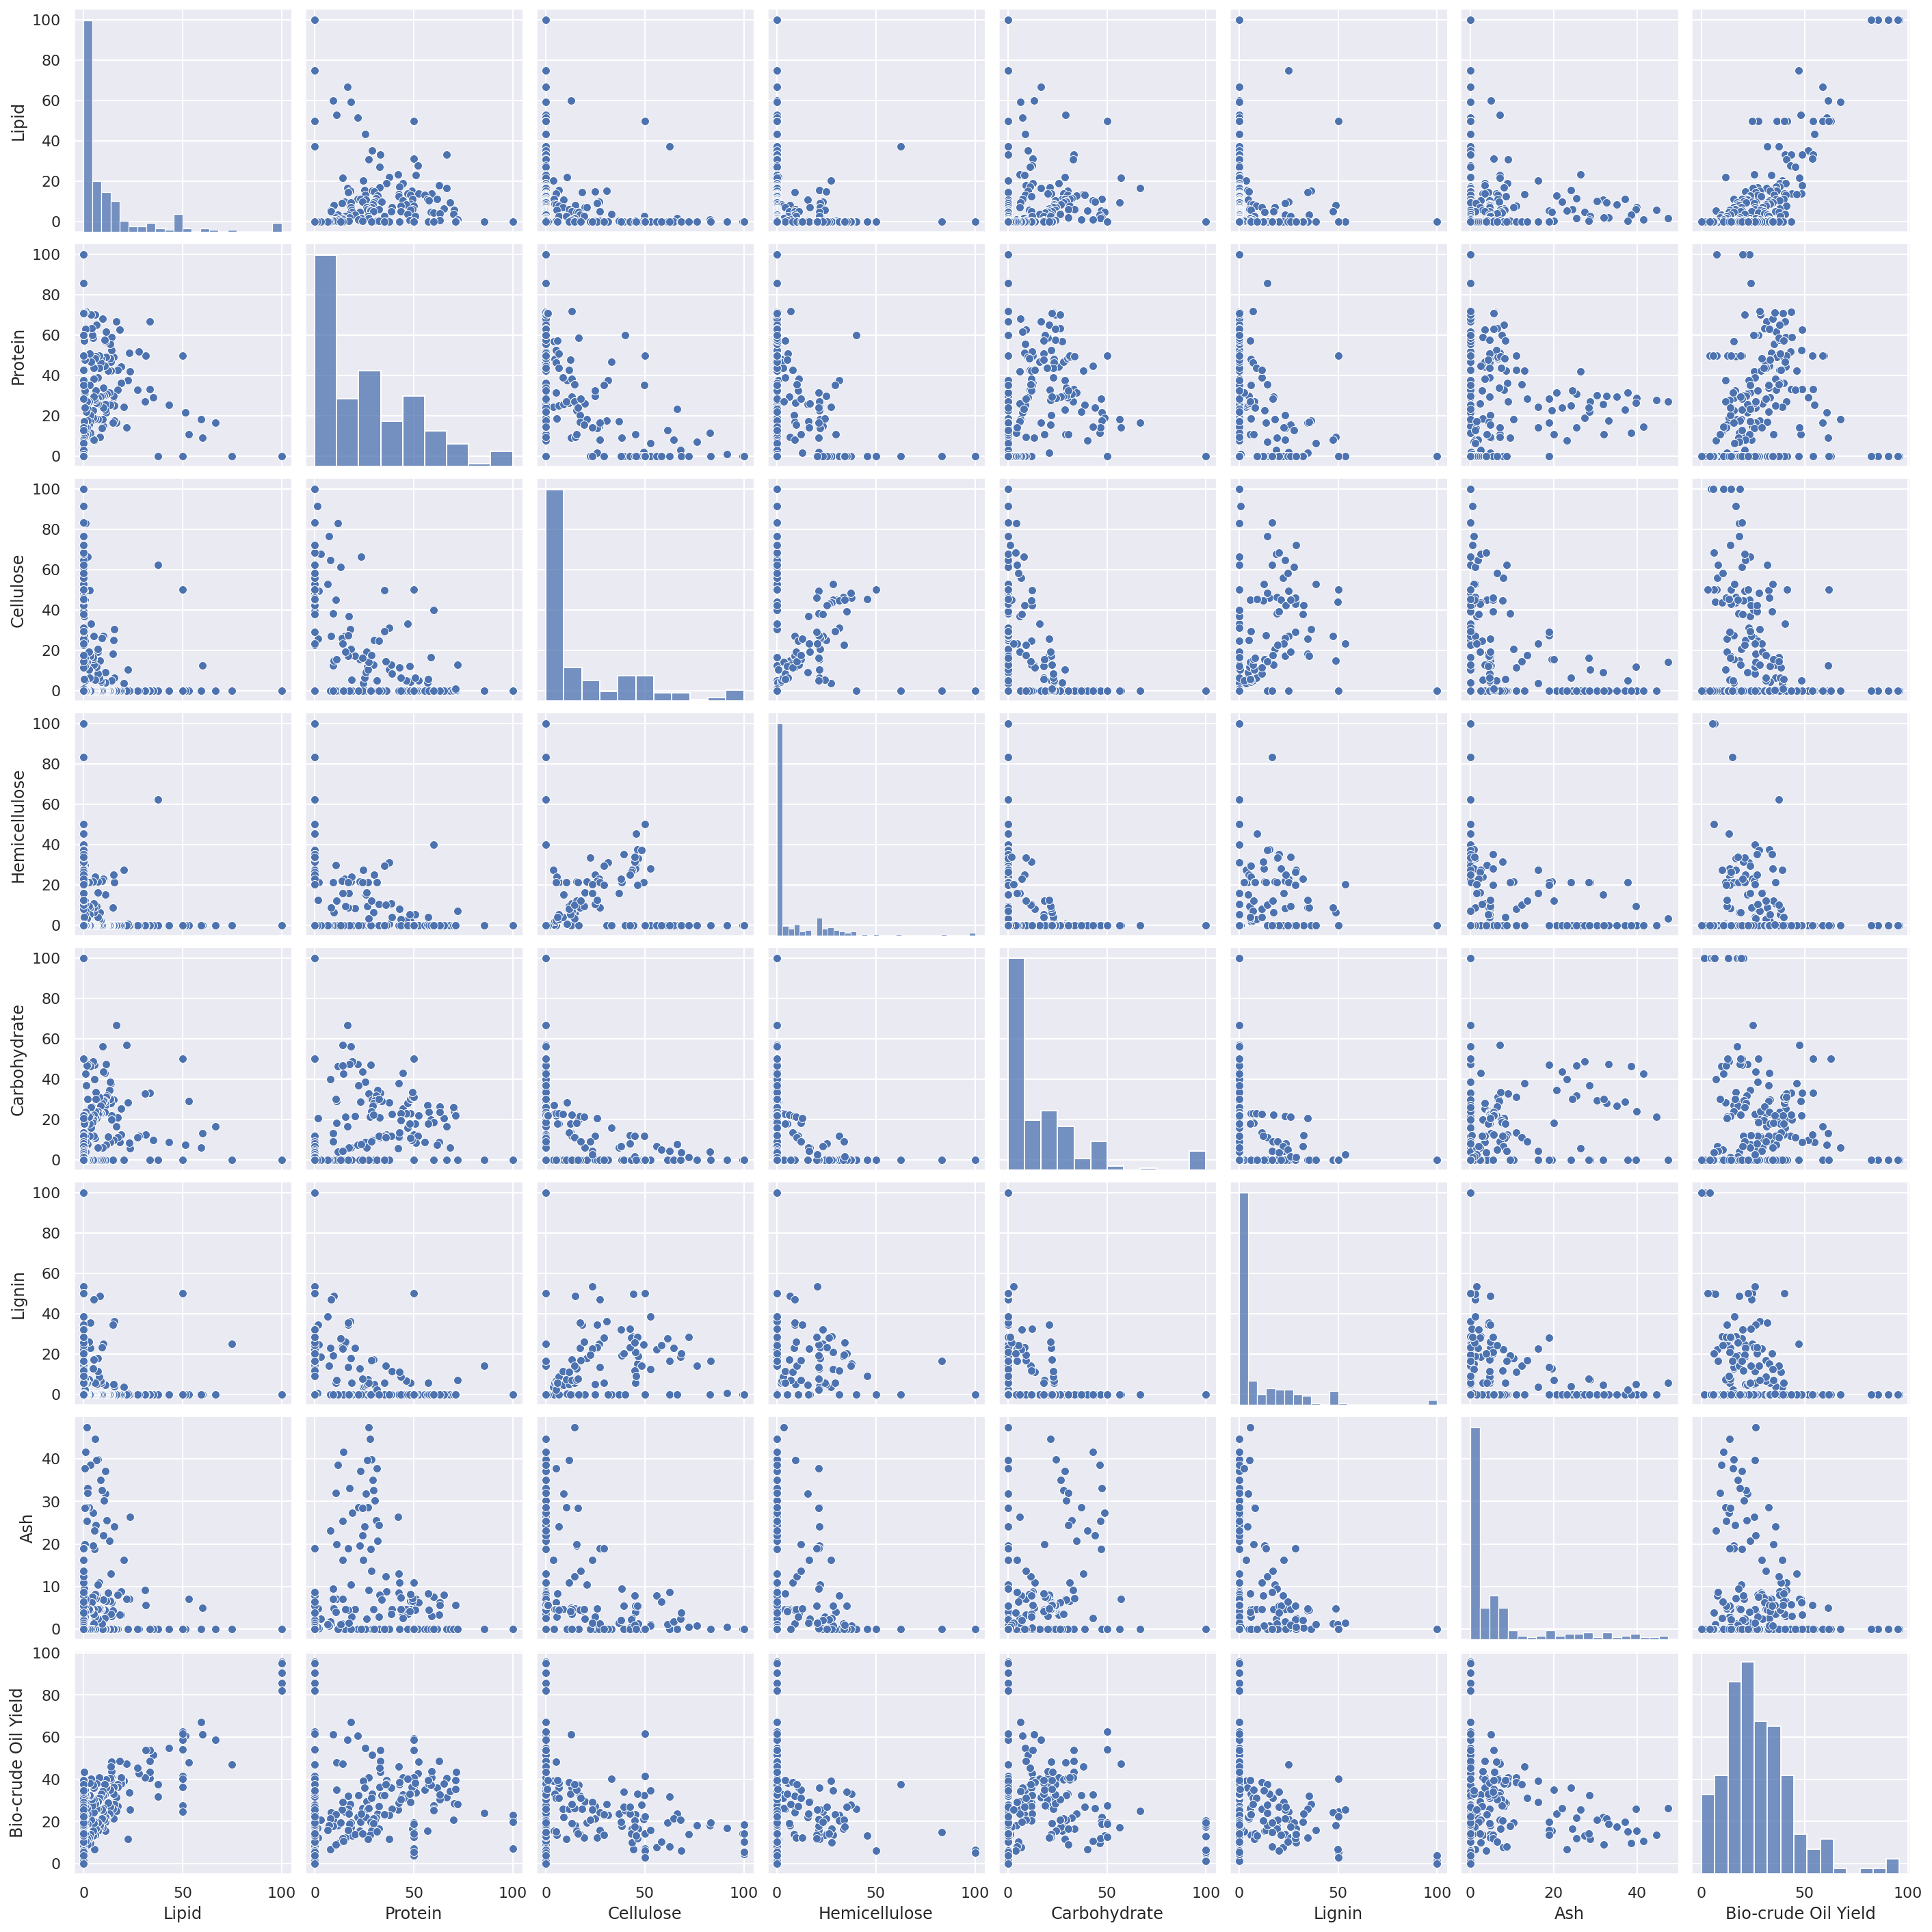

In [ ]:
# Scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

# Initialization
sns.set()

# Draw the distribution matrix
sns.pairplot(data)

# save figure
plt.savefig('cHB.png')
plt.show()

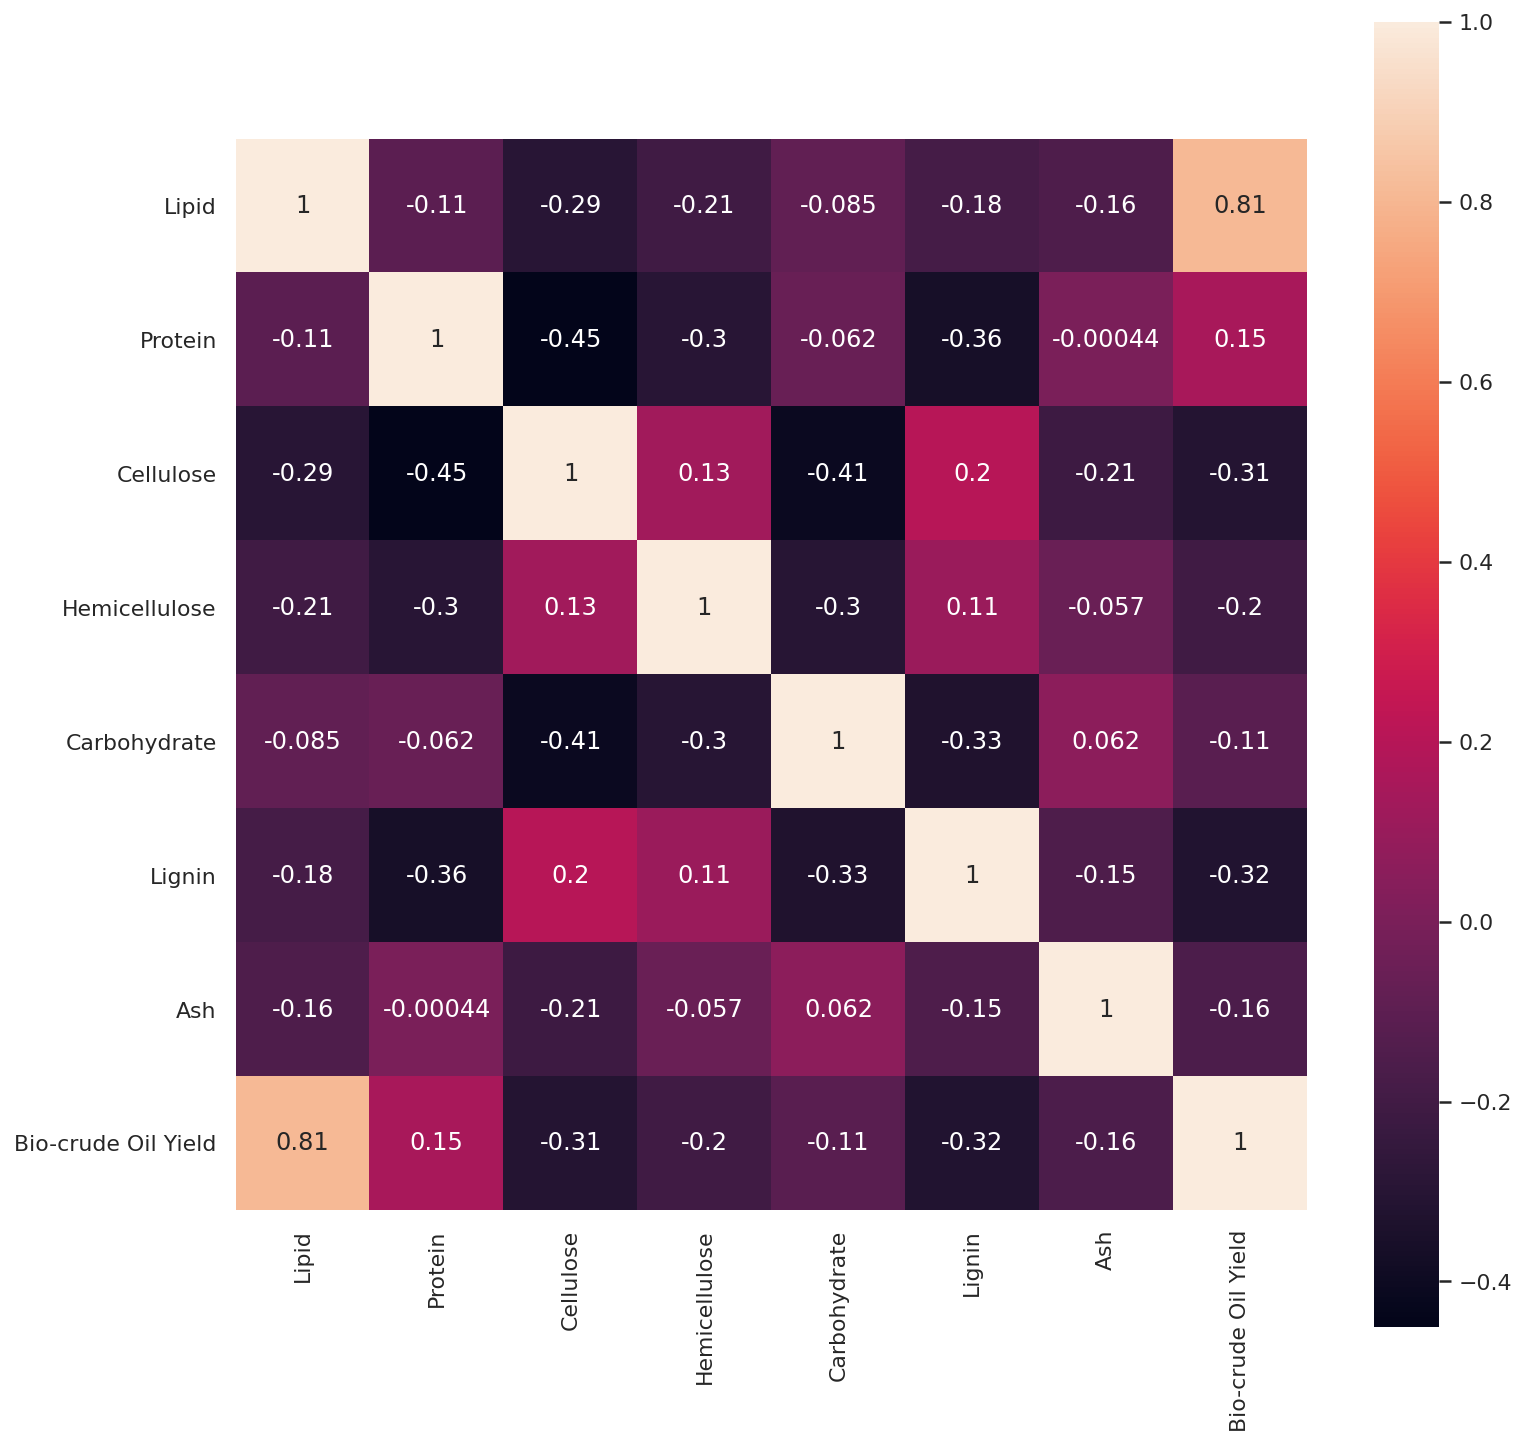

In [ ]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [3]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [5]:
# Ridge Regression
# Model set up & training
from sklearn.linear_model import Ridge

# TODO: Import 'KFold'
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 69)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)

# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

rd_intercept_all=[]
rd_coef_all=[]

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    # Alpha here is regularization parameter, initialize as 1.
    rd = Ridge(alpha=1)
    rd.fit(X_train, y_train)
    # print(rd.coef_)
    # print(rd.intercept_)

    # Predict training set and test set
    y_train_predict = rd.predict(X_train)
    y_test_predict = rd.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    rd_intercept_all.append(rd.intercept_)
    rd_coef_all.append(rd.coef_)
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of rd.intercept",np.mean(rd_intercept_all))
print("Standard deviation of rd.intercept",np.std(rd_intercept_all))
print("Mean values of rd.coef",np.mean(rd_coef_all, axis=0))
print("Standard deviations of rd.coef",np.std(rd_coef_all, axis=0))
print("")
print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
y_valid_predict = rd.predict(X_valid)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Mean value of rd.intercept 29.161741962571305
Standard deviation of rd.intercept 4.884606270123162
Mean values of rd.coef [ 0.5623617   0.0081695  -0.1184982  -0.05969854 -0.13991545 -0.24518861
 -0.22801789]
Standard deviations of rd.coef [0.07146545 0.05350399 0.0439764  0.04034491 0.05360318 0.07195798
 0.0503285 ]

Mean value of MAE of training set 6.711724667740173
Standard deviation of MAE of training set 0.15215478468376611
Mean value of MAE of test set 7.107723201772188
Standard deviation of MAE of test set 0.5973221350584276

Mean value of RMSE of training set 8.551256640377833
Standard deviation of RMSE of training set 0.12351326866510358
Mean value of RMSE of test set 9.087682924399678
Standard deviation of RMSE of test set 0.5654966377845212

Mean value of R2 of training set 0.7483339963669292
Standard deviation of R2 of training set 0.023493243715031874
Mean value of R2 of test set 0.6781285804686377
Standard deviation of R2 of test set 0.09823293993729547

Mean value of M

Text(0.5, 1.0, 'y_pred vs. y_true')

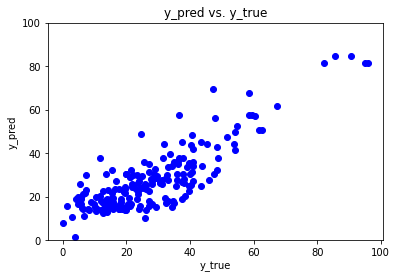

In [6]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

Text(0.5, 1.0, 'y_pred vs. y_true')

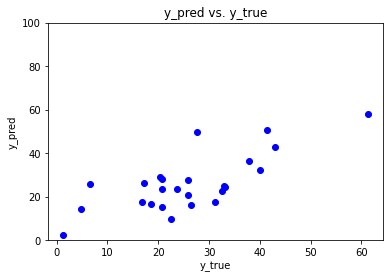

In [7]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

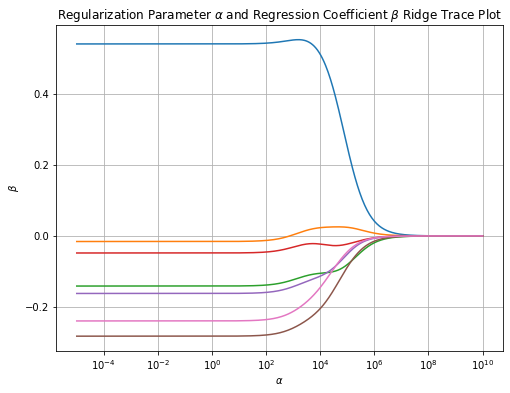

In [9]:
# In KFold, use one group of X_train and y_train to draw Ridge plot.
# Parameter set and model training
import matplotlib.pyplot as plt

alphas=10**np.linspace(-5,10,500)
betas=[]
for alpha in alphas: 
  rd = Ridge(alpha = alpha)
  rd.fit(X_train, y_train)
  betas.append(rd.coef_)

# Draw Ridge plot
plt.figure(figsize=(8,6))
plt.plot(alphas,betas)

# Log transformation of data
plt.xscale('log')

# Add grid
plt.grid(True)

# Axis
plt.axis('tight')
plt.title(r'Regularization Parameter $\alpha$ and Regression Coefficient $\beta$ Ridge Trace Plot')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()


In [10]:
# Cross-validated ridge regression
from sklearn.linear_model import RidgeCV
from sklearn import metrics
rd_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
rd_cv.fit(X_train,y_train)
rd_cv.alpha_

5217.168575554354

In [11]:

# Model training using alpha equal to 5217.168575554354

rd=Ridge(alpha=5217.168575554354)
fit_intercept=False
rd.fit(X_train,y_train)
print(rd.coef_)
print(rd.intercept_)

[ 0.53820986  0.01989582 -0.10806379 -0.02161533 -0.12191899 -0.22476499
 -0.16960699]
27.436859372786007


In [12]:

# Cross-validated ridge regression
from sklearn.linear_model import RidgeCV
from sklearn import metrics
rd_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
rd_cv.fit(X_train,y_train)

# Model training using alpha equal to rd_cv.alpha_
rd=Ridge(alpha=rd_cv.alpha_)
fit_intercept=False
rd.fit(X_train,y_train)
print(rd.coef_)
print(rd.intercept_)

[ 0.53820986  0.01989582 -0.10806379 -0.02161533 -0.12191899 -0.22476499
 -0.16960699]
27.436859372786007


In [14]:
# Modified Ridge Regression
# Model set up & training
from sklearn.linear_model import Ridge

# TODO: Import 'KFold'
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

# Cross-validated ridge regression
from sklearn.linear_model import RidgeCV

np.random.seed(seed = 69)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)

# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

rd_intercept_all=[]
rd_coef_all=[]

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    rd_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
    rd_cv.fit(X_train,y_train)
    
    # Model training using alpha equal to rd_cv.alpha_
    rd=Ridge(alpha=rd_cv.alpha_)
    fit_intercept=False
    rd.fit(X_train, y_train)
    # print(rd.coef_)
    # print(rd.intercept_)

    # Predict training set and test set
    y_train_predict = rd.predict(X_train)
    y_test_predict = rd.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    rd_intercept_all.append(rd.intercept_)
    rd_coef_all.append(rd.coef_)
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of rd.intercept",np.mean(rd_intercept_all))
print("Standard deviation of rd.intercept",np.std(rd_intercept_all))
print("Mean values of rd.coef",np.mean(rd_coef_all, axis=0))
print("Standard deviations of rd.coef",np.std(rd_coef_all, axis=0))
print("")
print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
y_valid_predict = rd.predict(X_valid)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Mean value of rd.intercept 27.012086477200626
Standard deviation of rd.intercept 1.4730595048983204
Mean values of rd.coef [ 0.54944176  0.03058533 -0.09976148 -0.04261133 -0.1133302  -0.20000247
 -0.16760853]
Standard deviations of rd.coef [0.05050962 0.01749735 0.01556511 0.01262098 0.01705936 0.03019384
 0.02010822]

Mean value of MAE of training set 6.8976325979873225
Standard deviation of MAE of training set 0.08223188888423553
Mean value of MAE of test set 7.294568210554184
Standard deviation of MAE of test set 0.8983223501425828

Mean value of RMSE of training set 8.622392606123878
Standard deviation of RMSE of training set 0.0766415092114895
Mean value of RMSE of test set 9.154951687325376
Standard deviation of RMSE of test set 0.8117283613015492

Mean value of R2 of training set 0.7437595259339858
Standard deviation of R2 of training set 0.027589948919251574
Mean value of R2 of test set 0.6790437216712394
Standard deviation of R2 of test set 0.08397773732126136

Mean value of 

Text(0.5, 1.0, 'y_pred vs. y_true')

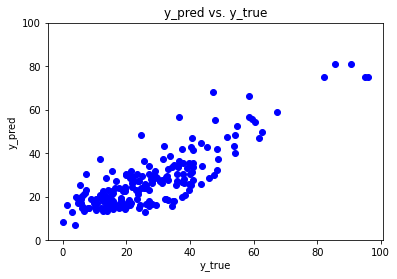

In [15]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_MLR_Ridge.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

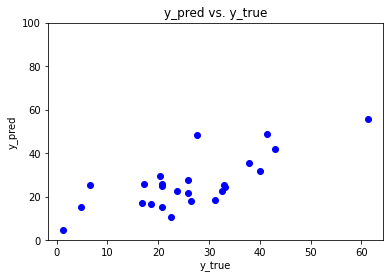

In [16]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

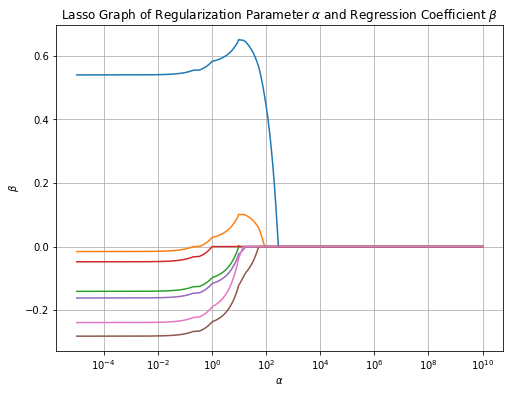

In [17]:
# In KFold, use one group of X_train and y_train to draw Lasso plot.
# Model training
from sklearn.linear_model import Lasso
alphas = 10**np.linspace(-5,10,500)
betas = []
for alpha in alphas:
  Las = Lasso(alpha = alpha)
  Las.fit(X_train,y_train)
  betas.append(Las.coef_)
plt.figure(figsize=(8,6))
plt.plot(alphas,betas)
plt.xscale('log')
plt.grid(True)
plt.axis('tight')
plt.title(r'Lasso Graph of Regularization Parameter $\alpha$ and Regression Coefficient $\beta$')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

In [19]:

# Optimize regularization parameter of Lasso regression using cross-validation 
from sklearn.linear_model import LassoCV
from sklearn import metrics
Las_cv = LassoCV(alphas=alphas,cv=10)
Las_cv.fit(X_train,y_train)
Las_cv.alpha_

1.8218853434651652

In [20]:

# Train model using alpha equal to 1.8218853434651652
Las = Lasso(alpha=1.8218853434651652)
fit_intercept=False
Las.fit(X_train,y_train)
print(Las.coef_)
print(Las.intercept_)

[ 0.58946372  0.03539954 -0.08865039 -0.         -0.10757044 -0.22612075
 -0.17504247]
25.734808560819097


In [21]:

# Optimize regularization parameter of Lasso regression using cross-validation 
from sklearn.linear_model import LassoCV
from sklearn import metrics
Las_cv = LassoCV(alphas=alphas,cv=10)
Las_cv.fit(X_train,y_train)

# Train model using alpha equal to Las_cv.alpha_
Las = Lasso(alpha=Las_cv.alpha_)
fit_intercept=False
Las.fit(X_train,y_train)
print(Las.coef_)
print(Las.intercept_)

[ 0.58946372  0.03539954 -0.08865039 -0.         -0.10757044 -0.22612075
 -0.17504247]
25.734808560819097


In [24]:
# Modified Lasso Regression
# Model set up & training
from sklearn.linear_model import Lasso

# TODO: Import 'KFold'
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

# Cross-validated ridge regression
from sklearn.linear_model import LassoCV

np.random.seed(seed = 69)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)

# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

Las_intercept_all=[]
Las_coef_all=[]

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    Las_cv = LassoCV(alphas=alphas,cv=10)
    Las_cv.fit(X_train,y_train)
    
    # Train model using alpha equal to Las_cv.alpha_
    Las = Lasso(alpha=Las_cv.alpha_)
    fit_intercept=False
    Las.fit(X_train,y_train)
    # print(rd.coef_)
    # print(rd.intercept_)

    # Predict training set and test set
    y_train_predict = Las.predict(X_train)
    y_test_predict = Las.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    Las_intercept_all.append(Las.intercept_)
    Las_coef_all.append(Las.coef_)
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of Las.intercept",np.mean(Las_intercept_all))
print("Standard deviation of Las.intercept",np.std(Las_intercept_all))
print("Mean values of Las.coef",np.mean(Las_coef_all, axis=0))
print("Standard deviations of Las.coef",np.std(Las_coef_all, axis=0))
print("")
print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
y_valid_predict = Las.predict(X_valid)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Mean value of Las.intercept 21.567168611426677
Standard deviation of Las.intercept 3.0627281738168843
Mean values of Las.coef [ 0.63147656  0.08032374 -0.04117758  0.         -0.05685241 -0.14679551
 -0.10848078]
Standard deviations of Las.coef [0.04264645 0.02987033 0.03543944 0.         0.03544555 0.06755295
 0.06991926]

Mean value of MAE of training set 6.914587579831125
Standard deviation of MAE of training set 0.2144211869807604
Mean value of MAE of test set 7.315743920452417
Standard deviation of MAE of test set 0.6766037531915035

Mean value of RMSE of training set 8.624712752451735
Standard deviation of RMSE of training set 0.11469017345528912
Mean value of RMSE of test set 9.148377040031615
Standard deviation of RMSE of test set 0.6459869877519967

Mean value of R2 of training set 0.7438741753245346
Standard deviation of R2 of training set 0.025305456628615074
Mean value of R2 of test set 0.6720660762951085
Standard deviation of R2 of test set 0.10852478569644976

Mean value 

Text(0.5, 1.0, 'y_pred vs. y_true')

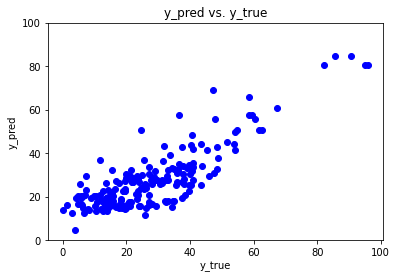

In [25]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_MLR_Lasso.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

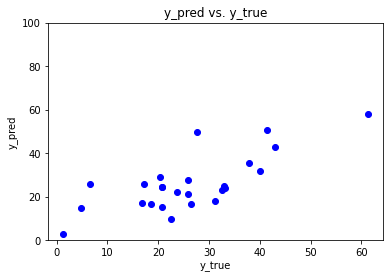

In [26]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')